# deeptrack.aberrations

<a href="https://colab.research.google.com/github/DeepTrackAI/DeepTrack2/blob/develop/tutorials/3-advanced-topics/DTAT325_aberrations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install deeptrack  # Uncomment if running on Colab/Kaggle.

This advanced tutorial introduces the module deeptrack.aberrations.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 1. What is an aberration?

Aberrations are some alteration of the pupil function of an optical system. They receive as input the complex pupil function in Fourier space. The method `.get()` may optionally receive the position of each pixel in polar coordinates through the keyword arguments `rho` and `theta`. 

The feature, or set of features, is passed to the optical system on initilization through the `aberration` keyword.

## 2. Example of an Aberration

Below is the implementation of the feature `GaussianApodization`. It scales the amplitude of the pupil as a function of the distance from the central pixel.

In [3]:
from deeptrack.aberrations import Aberration

class GaussianApodization(Aberration):
    """Implementation of abstract class Aberration, which decreases the
    amplitude of the pupil at high frequencies."""
    
    def get(self, pupil, sigma=1, rho=None, **kwargs):
        return pupil * np.exp(-(rho / sigma) ** 2) 

## 3. The Effect of Different Aberrations

Here we show aberrations in use. You will see the point spread function of an aberrated particle and an unaberrated particle in focus, 10 micron under focus and 10 micron over focus. 

In [4]:
from deeptrack import Arguments, Fluorescence, PointParticle
from deeptrack import units as u

arguments = Arguments(z=0)

particle = PointParticle(
    position=(32, 32),
    position_unit="pixel",
    intensity=1,
    z=arguments.z,
)

unaberrated_optics = Fluorescence(
    NA=0.3,
    resolution=1 * u.um,
    magnification=10,
    wavelength=530 * u.nm,
    output_region=(0, 0, 64, 64),
    padding=(128, 128, 128, 128),
)

unaberrated_particle = unaberrated_optics(particle).bind_arguments(arguments)

In [5]:
def plot(unaberrated, aberrated):
    
    plt.subplot(2, 3, 1)
    im = aberrated.resolve(z=-10 * u.um)
    plt.imshow(im[:, :, 0], cmap="gray")
    plt.axis("off")
    plt.title("Aberrated \n Focus: -10 mu")
    
    plt.subplot(2, 3, 2)
    im = aberrated.resolve(z=0)
    plt.imshow(im[:, :, 0], cmap="gray")
    plt.axis("off")
    plt.title("Aberrated \n Focus: 0 mu")
    
    plt.subplot(2, 3, 3)
    im = aberrated.resolve(z=10 * u.um)
    plt.imshow(im[:, :, 0], cmap="gray")
    plt.axis("off")
    plt.title("Aberrated \n Focus: 10 mu")
    
    
    plt.subplot(2, 3, 4)
    im = unaberrated.resolve(z=-10 * u.um)
    plt.imshow(im[:, :, 0], cmap="gray")
    plt.axis("off")
    plt.title("Unaberrated \n Focus: -10 mu")
    
    plt.subplot(2, 3, 5)
    im = unaberrated.resolve(z=0)
    plt.imshow(im[:, :, 0], cmap="gray")
    plt.axis("off")
    plt.title("Unaberrated \n Focus: 0 mu")
    
    plt.subplot(2, 3, 6)
    im = unaberrated.resolve(z=10 * u.um)
    plt.axis("off")
    plt.imshow(im[:, :, 0], cmap="gray")
    plt.title("Unaberrated \n Focus: 10 mu")

### SphericalAberration

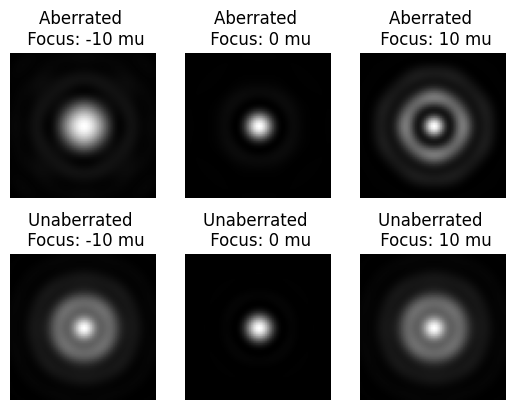

In [6]:
from deeptrack.aberrations import SphericalAberration

aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1 * u.um,
    magnification=10,
    wavelength=530 * u.nm,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    pupil=SphericalAberration(coefficient=0.5),
)

aberrated_particle = aberrated_optics(particle).bind_arguments(arguments)

plot(unaberrated_particle, aberrated_particle)

### Apodization

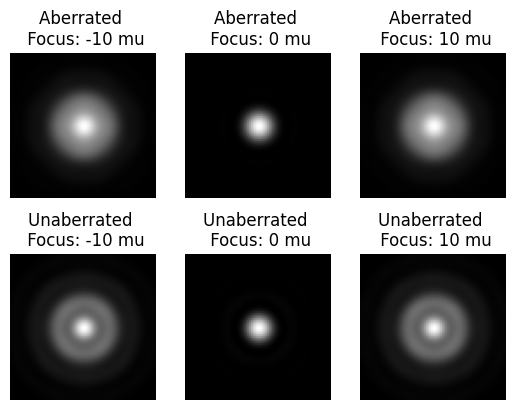

In [7]:
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    pupil=GaussianApodization(sigma=1),
)

aberrated_particle = aberrated_optics(particle).bind_arguments(arguments)

plot(unaberrated_particle, aberrated_particle)

### Piston

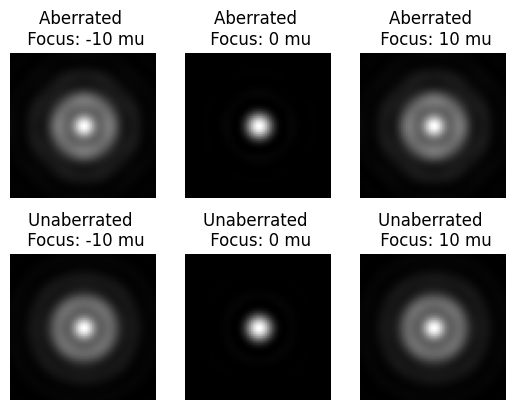

In [8]:
from deeptrack.aberrations import Piston

aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    pupil=Piston(coefficient=1),
)

aberrated_particle = aberrated_optics(particle).bind_arguments(arguments)

plot(unaberrated_particle, aberrated_particle)

### VerticalTilt

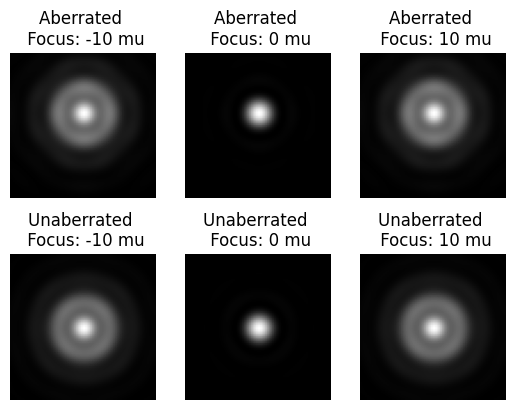

In [9]:
from deeptrack.aberrations import VerticalTilt

aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    pupil=VerticalTilt(coefficient=1),
)

aberrated_particle = aberrated_optics(particle).bind_arguments(arguments)

plot(unaberrated_particle, aberrated_particle)

### HorizontalTilt

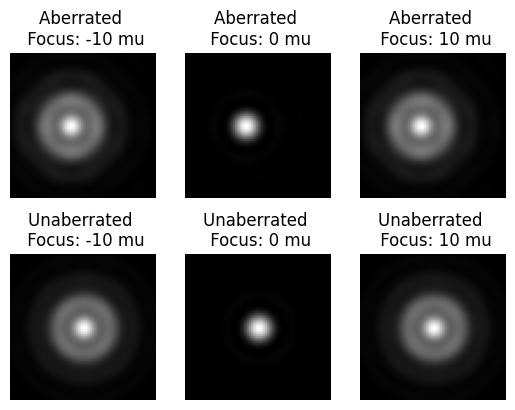

In [10]:
from deeptrack.aberrations import HorizontalTilt
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    pupil=HorizontalTilt(coefficient=1),
)

aberrated_particle = aberrated_optics(particle).bind_arguments(arguments)

plot(unaberrated_particle, aberrated_particle)

### ObliqueAstigmatism

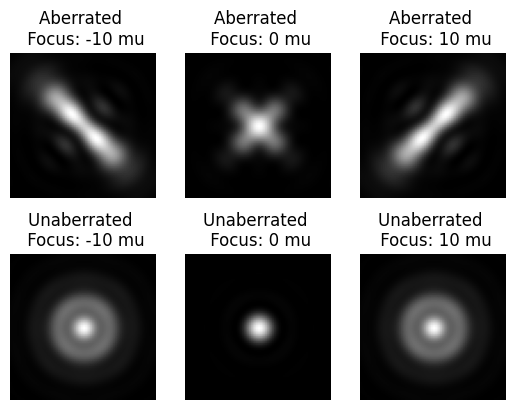

In [11]:
from deeptrack.aberrations import ObliqueAstigmatism

aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    pupil=ObliqueAstigmatism(coefficient=1),
)

aberrated_particle = aberrated_optics(particle).bind_arguments(arguments)

plot(unaberrated_particle, aberrated_particle)

### Defocus

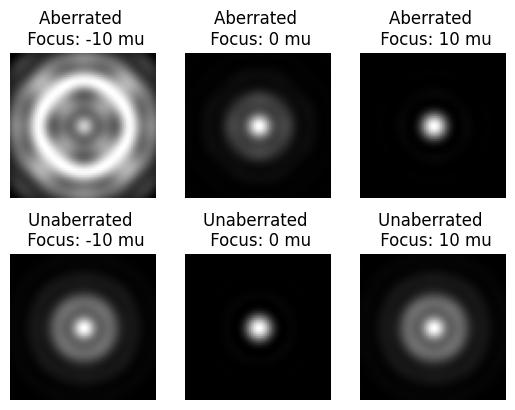

In [12]:
from deeptrack.aberrations import Defocus

aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    pupil=Defocus(coefficient=1),
)

aberrated_particle = aberrated_optics(particle).bind_arguments(arguments)

plot(unaberrated_particle, aberrated_particle)

### Astigmatism

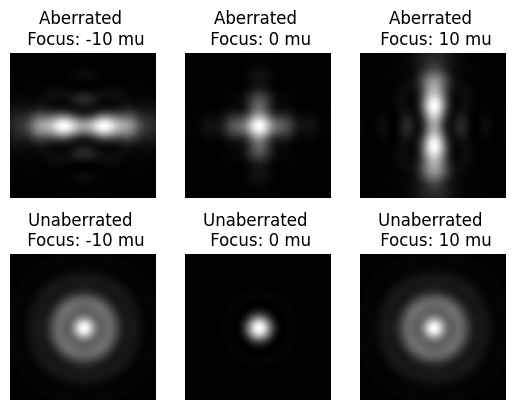

In [13]:
from deeptrack.aberrations import Astigmatism

aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    pupil=Astigmatism(coefficient=1),
)

aberrated_particle = aberrated_optics(particle).bind_arguments(arguments)

plot(unaberrated_particle, aberrated_particle)

### ObliqueTrefoil

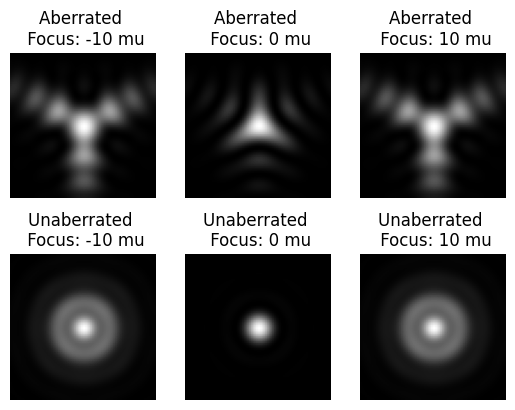

In [14]:
from deeptrack.aberrations import ObliqueTrefoil

aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    pupil=ObliqueTrefoil(coefficient=1),
)

aberrated_particle = aberrated_optics(particle).bind_arguments(arguments)

plot(unaberrated_particle, aberrated_particle)

### VerticalComa

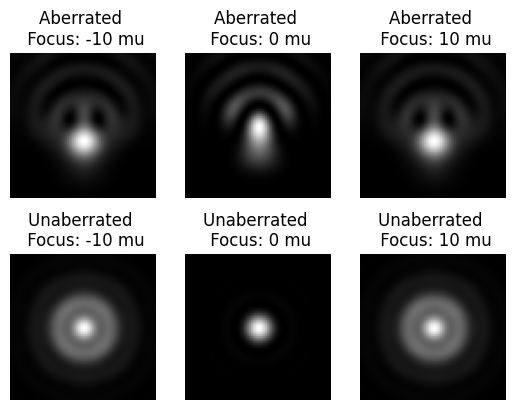

In [15]:
from deeptrack.aberrations import VerticalComa

aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    pupil=VerticalComa(coefficient=1),
)

aberrated_particle = aberrated_optics(particle).bind_arguments(arguments)

plot(unaberrated_particle, aberrated_particle)

### HorizontalComa

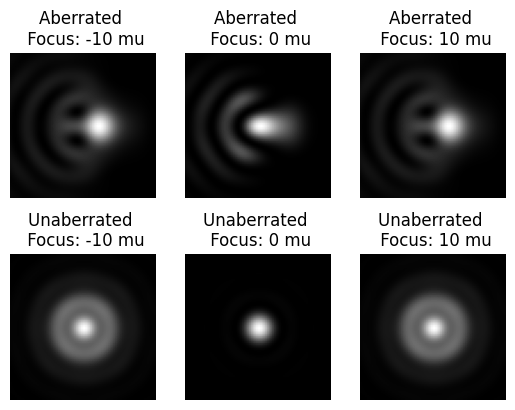

In [16]:
from deeptrack.aberrations import HorizontalComa
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    pupil=HorizontalComa(coefficient=1),
)

aberrated_particle = aberrated_optics(particle).bind_arguments(arguments)

plot(unaberrated_particle, aberrated_particle)

### Trefoil

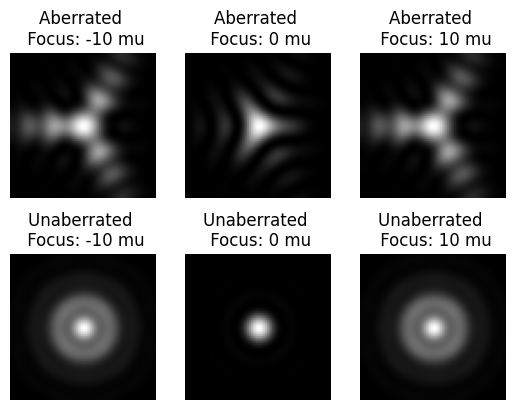

In [17]:
from deeptrack.aberrations import Trefoil
aberrated_optics = Fluorescence(
    NA = 0.3,
    resolution=1e-6,
    magnification=10,
    wavelength=530e-9,
    output_region=(0, 0, 64, 64),
    padding=(64, 64, 64, 64),
    pupil=Trefoil(coefficient=1),
)

aberrated_particle = aberrated_optics(particle).bind_arguments(arguments)

plot(unaberrated_particle, aberrated_particle)